In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Generate some toy user and movie data

# Number of users
n_users = 100

# Number of movies
n_movies = 10

# Number of ratings
n_ratings = 1000

# Generate random user ids
user_ids = np.random.randint(0, n_users, n_ratings)

# Generate random movie ids
movie_ids = np.random.randint(0, n_movies, n_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, n_ratings)

# Create a dataframe with the data
df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings})

# We should not have any duplicate ratings for the same user and movie
# Drop any rows that have duplicate user_id and movie_id pairs
df = df.drop_duplicates(['user_id', 'movie_id'])


In [3]:
df

,user_id,movie_id,rating
0,65,6,4
1,38,9,3
2,51,6,4
3,49,6,1
4,30,9,2
...,...,...,...
982,6,4,4
988,9,3,5
993,92,7,4
996,91,8,4


In [4]:
# Create a user-item matrix

A = df.pivot(index='user_id', columns='movie_id', values='rating')
A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,5.0,5.0,NaN
1,4.0,1.0,5.0,2.0,NaN,NaN,NaN,NaN,1.0,3.0
2,2.0,NaN,4.0,4.0,5.0,3.0,2.0,NaN,3.0,3.0
3,1.0,1.0,4.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN
4,5.0,NaN,5.0,NaN,3.0,2.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,4.0,2.0,4.0,2.0,4.0,3.0
96,2.0,5.0,NaN,3.0,3.0,NaN,1.0,NaN,NaN,2.0
97,1.0,4.0,NaN,3.0,NaN,NaN,4.0,4.0,NaN,NaN


In [5]:
# Fill in the missing values with zeros
A = A.fillna(0)

A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,5.0,5.0,0.0
1,4.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0
2,2.0,0.0,4.0,4.0,5.0,3.0,2.0,0.0,3.0,3.0
3,1.0,1.0,4.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
4,5.0,0.0,5.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,4.0,2.0,4.0,2.0,4.0,3.0
96,2.0,5.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,2.0
97,1.0,4.0,0.0,3.0,0.0,0.0,4.0,4.0,0.0,0.0


In [6]:
# Cosine similarity between U1 and U2

# User 1
u1 = A.loc[0]

# User 2
u2 = A.loc[1]

# Compute the dot product
dot = np.dot(u1, u2)

# Compute the L2 norm
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)

# Compute the cosine similarity
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.41403933560541256

In [7]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(A)

pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.414039,0.444165,0.506370,0.242061,0.726184,0.250490,0.466156,0.584523,0.577540,...,0.517115,0.530742,0.793416,0.661635,0.715626,0.480384,0.232737,0.525499,0.473365,0.790569
1,0.414039,1.000000,0.668734,0.655178,0.751672,0.217150,0.453743,0.769420,0.309898,0.475183,...,0.408491,0.489979,0.410632,0.283965,0.527068,0.215473,0.463281,0.245652,0.579066,0.054554
2,0.444165,0.668734,1.000000,0.572503,0.690704,0.612511,0.859727,0.763085,0.598691,0.693629,...,0.571463,0.532870,0.507253,0.456125,0.566807,0.711233,0.563857,0.301172,0.886186,0.255377
3,0.506370,0.655178,0.572503,1.000000,0.759950,0.245145,0.570782,0.593308,0.541435,0.314945,...,0.144707,0.196116,0.502202,0.539319,0.627182,0.291903,0.353553,0.334767,0.588348,0.320256
4,0.242061,0.751672,0.690704,0.759950,1.000000,0.171875,0.636656,0.536745,0.455530,0.286770,...,0.105409,0.361111,0.464134,0.406250,0.626277,0.310087,0.346688,0.147720,0.708333,0.102062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.480384,0.215473,0.711233,0.291903,0.310087,0.589165,0.481325,0.447868,0.630078,0.469516,...,0.496828,0.385886,0.571717,0.496139,0.634663,1.000000,0.378412,0.390877,0.620174,0.506370
96,0.232737,0.463281,0.563857,0.353553,0.346688,0.346688,0.437237,0.798465,0.658506,0.334050,...,0.657794,0.724192,0.266333,0.017334,0.546964,0.378412,1.000000,0.637312,0.485363,0.000000
97,0.525499,0.245652,0.301172,0.334767,0.147720,0.640119,0.318465,0.627896,0.754019,0.406671,...,0.498273,0.641943,0.504362,0.393919,0.629879,0.390877,0.637312,1.000000,0.415804,0.428845
98,0.473365,0.579066,0.886186,0.588348,0.708333,0.645833,0.889297,0.748190,0.533752,0.669129,...,0.579751,0.648148,0.682863,0.625000,0.604069,0.620174,0.485363,0.415804,1.000000,0.340207


<AxesSubplot:>

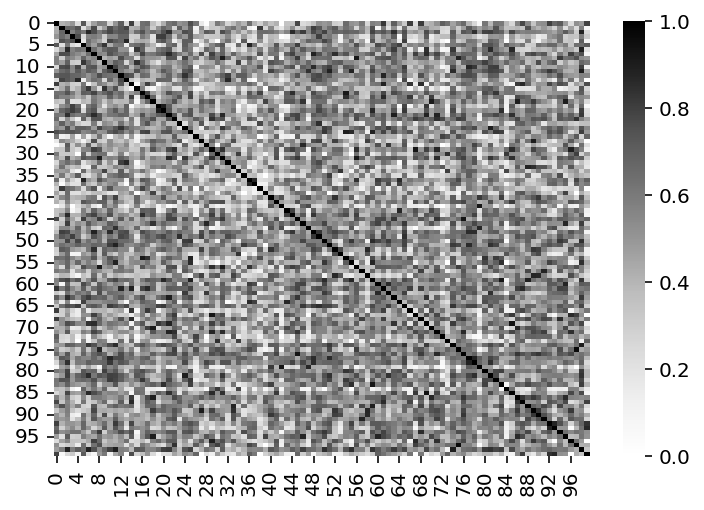

In [8]:
import seaborn as sns

sns.heatmap(sim_matrix, cmap='Greys')


In [9]:
# Find the most similar users to user u 

def k_nearest_neighbors(A, u, k):
    """Find the k nearest neighbors for user u"""
    # Find the index of the user in the matrix
    u_index = A.index.get_loc(u)
    
    # Compute the similarity between the user and all other users
    sim_matrix = cosine_similarity(A)

    # Find the k most similar users
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    
    # Return the user ids
    return A.index[k_nearest]

In [10]:
k_nearest_neighbors(A, 0, 5)

Int64Index([61, 68, 66, 14, 92], dtype='int64', name='user_id')

In [11]:
# Show matrix of movie ratings for u and k nearest neighbors

def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [12]:
show_neighbors(A, 0, 5)

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,5.0,5.0,0.0
61,2.0,0.0,2.0,2.0,2.0,0.0,2.0,4.0,4.0,3.0
68,5.0,4.0,0.0,2.0,0.0,0.0,1.0,5.0,5.0,2.0
66,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,1.0
14,3.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,5.0,3.0
92,2.0,2.0,2.0,0.0,0.0,4.0,1.0,4.0,4.0,0.0


In [13]:
# Rating for user u for movie 0 is: (4.0 + 3.0) / 2 = 3.5 (Discard 0s)

def predict_rating(A, u, m, k=5):
    """Predict the rating for user u for movie m"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Get the ratings for movie m
    ratings = df[m]
    
    # Calculate the mean of the ratings
    mean = ratings[1:][ratings != 0].mean()
    
    # Return the mean
    return mean

In [14]:
predict_rating(A, 0, 0)

3.0

In [15]:
# Now working with real data

# Load the data

df = pd.read_excel("mov-rec.xlsx")
df.head()

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2023-04-11 10:58:44.990,Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
1,2023-04-11 10:59:49.617,Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
2,2023-04-11 11:12:44.033,Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
3,2023-04-11 11:13:48.674,Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
4,2023-04-11 11:13:55.658,Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0


In [16]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
Dhruv,NaN,NaN,5.0,5.0,3.0,NaN,5.0,5.0,4.0,5.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Zeel B Patel,5.0,4.0,5.0,4.0,4.0,4.0,NaN,2.0,NaN,5.0
Neel,4.0,NaN,5.0,5.0,3.0,3.0,5.0,5.0,NaN,4.0


In [17]:
df.index

Index(['Nipun', 'Gautam Vashishtha', 'Eshan Gujarathi', 'Sai Krishna Avula',
       'Ankit Yadav ', 'Dhruv', 'Saatvik Rao ', 'Zeel B Patel', 'Neel ',
       'Sachin Jalan ', 'Ayush Shrivastava', '....', 'Hari Hara Sudhan',
       'Etikikota Hrushikesh', 'Chirag', 'Aaryan Darad', 'Hetvi Patel',
       'Kalash Kankaria', 'Rachit Verma', 'shriraj', 'Bhavini Korthi ',
       'Hitarth Gandhi ', 'Radhika Joglekar ', 'Medhansh Singh', 'Arun Mani',
       'Satyam ', 'Karan Kumar ', 'R Yeeshu Dhurandhar', 'Satyam Gupta',
       'rushali', 'shridhar', 'Tanvi Jain ', 'Manish Prabhubhai Salvi ',
       'Varun Barala', 'Kevin Shah ', 'Inderjeet', 'Gangaram Siddam ', 'Aditi',
       'Madhuri Awachar', 'Anupam', 'Jinay', 'Shrutimoy', 'Aadesh Desai',
       'Dhairya', 'Rahul C'],
      dtype='object', name='Your name')

In [18]:
# Get index for user and movie
user = 'Dhruv'

print(user in df.index)

# Get the movie ratings for user
#user_ratings = df.loc[user]
#user_ratings

True


In [19]:
df_copy = df.copy()
df_copy.fillna(0, inplace=True)
show_neighbors(df_copy, user, 5)


,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Dhruv,0.0,0.0,5.0,5.0,3.0,0.0,5.0,5.0,4.0,5.0
shriraj,3.0,2.0,5.0,4.0,2.0,3.0,4.0,5.0,4.0,5.0
Jinay,3.0,1.0,4.0,3.0,4.0,3.0,5.0,5.0,4.0,3.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Medhansh Singh,4.0,3.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0


In [20]:
# Predict the rating for user u for movie m

predict_rating(df_copy, user, 'The Dark Knight')

5.0

In [21]:
predict_rating(df_copy, user, 'Sholay')

3.4

In [42]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# D is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D

tensor([[2., 1., 1., 5., 4., 1., 4., 3., 1., 2.],
        [2., 3., 5., 2., 1., 2., 3., 2., 3., 3.],
        [1., 3., 2., 4., 3., 1., 5., 4., 3., 2.],
        [5., 3., 1., 1., 3., 1., 1., 1., 2., 4.],
        [5., 3., 1., 4., 4., 3., 2., 3., 3., 2.],
        [2., 3., 4., 1., 2., 2., 2., 2., 2., 1.],
        [2., 3., 4., 1., 3., 5., 3., 4., 3., 4.],
        [3., 4., 2., 3., 4., 3., 3., 4., 4., 4.],
        [3., 5., 5., 2., 2., 1., 2., 5., 1., 2.],
        [1., 5., 2., 1., 3., 1., 2., 3., 5., 2.],
        [3., 1., 3., 1., 3., 4., 4., 3., 5., 1.],
        [1., 3., 5., 5., 3., 2., 5., 2., 3., 1.],
        [2., 5., 3., 2., 2., 4., 1., 5., 2., 5.],
        [1., 5., 1., 5., 1., 2., 4., 5., 5., 1.],
        [2., 4., 2., 1., 1., 4., 3., 5., 2., 4.],
        [5., 1., 1., 2., 4., 4., 4., 5., 4., 1.],
        [5., 5., 5., 2., 4., 3., 5., 5., 2., 2.],
        [2., 1., 1., 5., 3., 4., 1., 4., 4., 4.],
        [4., 1., 3., 4., 5., 5., 1., 4., 2., 4.],
        [5., 3., 2., 3., 5., 2., 3., 4., 1., 5.],


In [43]:
D.shape

torch.Size([100, 10])

Let us decompose D as AB. A is of shape (n, k) and B is of shape (k, n). We can write the above equation as:
D = AB 

In [52]:
# Randomly initialize A and B

A = torch.randn(n_users, 2, requires_grad=True)
B = torch.randn(n_movies, 2, requires_grad=True)

# Compute the loss

loss = torch.norm(torch.mm(A, B.t()) - D)
loss

tensor(115.5283, grad_fn=<LinalgVectorNormBackward0>)

In [53]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,0.081995,1.438427,2.290493,0.678477,-0.751512,-1.425289,-1.421520,-0.599862,0.559827,-0.649635
1,-0.649014,-1.048254,-1.410401,-0.872375,0.753041,0.766629,1.244575,0.877273,-0.183724,0.715164
2,-3.911201,-0.465408,0.965011,-2.711042,1.597091,-1.332324,1.835400,3.095583,1.297227,1.803867
3,0.651612,-0.904607,-1.749287,0.024314,0.227534,1.220988,0.644997,-0.147965,-0.619670,0.120069
4,1.750690,-0.576467,-1.701260,0.872011,-0.320449,1.394634,-0.061818,-1.091748,-0.903110,-0.471348
...,...,...,...,...,...,...,...,...,...,...
95,1.303457,-0.348241,-1.135708,0.684474,-0.279277,0.956007,-0.124401,-0.843165,-0.639135,-0.385608
96,-3.208896,-0.879868,-0.013779,-2.440943,1.560616,-0.586501,1.987955,2.726220,0.859660,1.693238
97,0.145054,-0.356799,-0.640791,-0.062217,0.128766,0.429899,0.294044,0.025261,-0.201806,0.093289
98,-3.767568,-0.869430,0.248466,-2.794717,1.750086,-0.855047,2.175662,3.139588,1.076558,1.917962


In [54]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,2.0,1.0,1.0,5.0,4.0,1.0,4.0,3.0,1.0,2.0
1,2.0,3.0,5.0,2.0,1.0,2.0,3.0,2.0,3.0,3.0
2,1.0,3.0,2.0,4.0,3.0,1.0,5.0,4.0,3.0,2.0
3,5.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0
4,5.0,3.0,1.0,4.0,4.0,3.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
95,5.0,4.0,4.0,4.0,3.0,3.0,1.0,2.0,4.0,5.0
96,4.0,5.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,4.0
97,1.0,4.0,3.0,3.0,2.0,4.0,5.0,2.0,2.0,4.0
98,5.0,3.0,1.0,1.0,5.0,1.0,4.0,4.0,2.0,5.0


In [55]:
# Optimizer

optimizer = optim.Adam([A, B], lr=0.01)

# Train the model

for i in range(1000):
    # Compute the loss
    loss = torch.norm(torch.mm(A, B.t()) - D)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(loss.item())

115.52832794189453
112.7713623046875
110.65110778808594
108.90686798095703
107.1790542602539
104.99609375
101.8652572631836
97.41974639892578
91.5863037109375
84.70346069335938
77.42243194580078
70.35626220703125
63.86996841430664
58.18073654174805
53.417049407958984
49.60642623901367
46.68671798706055
44.5410041809082
43.025020599365234
41.98737335205078
41.2883415222168
40.816036224365234
40.49069595336914
40.25889205932617
40.085994720458984
39.950340270996094
39.83889389038086
39.74393844604492
39.660831451416016
39.58662796020508
39.519351959228516
39.45756149291992
39.400169372558594
39.34630584716797
39.2952766418457
39.246498107910156
39.19949722290039
39.15385818481445
39.10924530029297
39.06536865234375
39.02199172973633
38.978912353515625
38.93598556518555
38.893089294433594
38.85015106201172
38.8071403503418
38.76405334472656
38.72092056274414
38.67781448364258
38.63483428955078
38.59209060668945
38.549720764160156
38.507877349853516
38.466712951660156
38.4263916015625
38.3

In [56]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,2.272087,2.567247,2.169096,2.363732,2.594773,2.349150,2.525624,2.665625,2.355196,2.397679
1,1.586249,2.788023,2.934170,2.762144,2.419219,2.773133,3.164435,2.794207,2.655946,1.722759
2,1.761482,3.091030,3.251198,3.061710,2.683427,3.073807,3.506994,3.098210,2.944282,1.912827
3,4.159266,2.099523,0.263199,1.423531,3.163138,1.341559,0.964538,2.442814,1.669656,4.261670
4,3.736264,3.079406,1.938160,2.611440,3.569788,2.563177,2.545827,3.312877,2.712392,3.886777
...,...,...,...,...,...,...,...,...,...,...
95,4.293660,3.536465,2.223963,2.998411,4.100918,2.942899,2.922329,3.804914,3.114660,4.466512
96,3.784583,2.498028,1.077427,1.951512,3.236830,1.889419,1.704584,2.773510,2.116307,3.906579
97,1.936005,3.259978,3.377530,3.211729,2.865497,3.222105,3.661241,3.276487,3.096488,2.095613
98,5.041747,3.106278,1.119416,2.352365,4.176830,2.264935,1.959050,3.487175,2.594204,5.193403


In [57]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,2.0,1.0,1.0,5.0,4.0,1.0,4.0,3.0,1.0,2.0
1,2.0,3.0,5.0,2.0,1.0,2.0,3.0,2.0,3.0,3.0
2,1.0,3.0,2.0,4.0,3.0,1.0,5.0,4.0,3.0,2.0
3,5.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0
4,5.0,3.0,1.0,4.0,4.0,3.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
95,5.0,4.0,4.0,4.0,3.0,3.0,1.0,2.0,4.0,5.0
96,4.0,5.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,4.0
97,1.0,4.0,3.0,3.0,2.0,4.0,5.0,2.0,2.0,4.0
98,5.0,3.0,1.0,1.0,5.0,1.0,4.0,4.0,2.0,5.0


In [58]:
def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(A, B.t()) - D)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [59]:
for k in [1, 2, 3, 4, 5, 6]:
    A, B, loss = factorize(D, k)
    print(k, loss.item())

1 41.75899124145508
2 38.171913146972656
3 34.42135238647461
4 31.025142669677734
5 27.342370986938477
6 23.161325454711914


In [61]:
# With missing values

# Randomly replace some entries with NaN

D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D[torch.rand(D.shape) < 0.5] = float('nan')
D

tensor([[nan, nan, nan, nan, 1., 2., nan, nan, 5., nan],
        [4., 4., nan, nan, 5., nan, nan, 3., 2., nan],
        [2., 5., nan, nan, 3., 1., 5., nan, 5., nan],
        [nan, nan, 4., nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, 1., nan, nan, 4., nan, nan, 4., nan],
        [nan, nan, 4., nan, nan, 5., 5., 5., 3., nan],
        [1., nan, nan, 1., 2., 3., nan, nan, nan, nan],
        [5., nan, 5., 2., nan, nan, nan, 3., 3., nan],
        [nan, nan, nan, 5., nan, nan, 2., 4., 3., 2.],
        [nan, nan, 1., nan, 5., 4., 1., nan, 4., 1.],
        [nan, 5., nan, 3., nan, 2., 5., 5., nan, 4.],
        [nan, 2., nan, 4., 4., nan, 4., 5., nan, 1.],
        [nan, 2., nan, nan, nan, 1., 1., 4., nan, nan],
        [nan, 5., nan, nan, nan, nan, nan, 2., 1., 3.],
        [nan, nan, 4., 2., 5., 2., 4., nan, nan, 5.],
        [5., 5., nan, nan, 1., nan, nan, 3., 1., nan],
        [nan, nan, nan, 5., 3., 3., nan, nan, 3., 5.],
        [1., nan, 5., 1., nan, 4., nan, nan, nan, nan],
   

In [63]:
A, B, loss = factorize(D, 2)
loss

tensor(nan, grad_fn=<LinalgVectorNormBackward0>)

In [66]:
mask = ~torch.isnan(D)
mask

tensor([[False, False, False, False,  True,  True, False, False,  True, False],
        [ True,  True, False, False,  True, False, False,  True,  True, False],
        [ True,  True, False, False,  True,  True,  True, False,  True, False],
        [False, False,  True, False, False, False, False, False, False, False],
        [False, False,  True, False, False,  True, False, False,  True, False],
        [False, False,  True, False, False,  True,  True,  True,  True, False],
        [ True, False, False,  True,  True,  True, False, False, False, False],
        [ True, False,  True,  True, False, False, False,  True,  True, False],
        [False, False, False,  True, False, False,  True,  True,  True,  True],
        [False, False,  True, False,  True,  True,  True, False,  True,  True],
        [False,  True, False,  True, False,  True,  True,  True, False,  True],
        [False,  True, False,  True,  True, False,  True,  True, False,  True],
        [False,  True, False, False, Fal

In [79]:
mask.sum()

tensor(462)

In [71]:
A = torch.randn(D.shape[0], k, requires_grad=True)
B = torch.randn(D.shape[1], k, requires_grad=True)

diff_matrix = torch.mm(A, B.t())-D
diff_matrix

tensor([[     nan,      nan,      nan,      nan,  -1.0875,  -1.6179,      nan,
              nan,  -3.2226,      nan],
        [ -5.3536,  -1.1332,      nan,      nan,  -5.4539,      nan,      nan,
          -3.7636,  -2.8529,      nan],
        [ -1.1229,  -2.7055,      nan,      nan,  -3.0259,  -0.8099,  -6.1392,
              nan,  -6.1499,      nan],
        [     nan,      nan,  -4.2913,      nan,      nan,      nan,      nan,
              nan,      nan,      nan],
        [     nan,      nan,   0.2508,      nan,      nan,  -4.8223,      nan,
              nan,  -5.0302,      nan],
        [     nan,      nan,  -5.3843,      nan,      nan,  -6.0856,  -4.8328,
          -5.6402,  -2.3883,      nan],
        [ -6.2670,      nan,      nan,  -2.7164,  -3.7729,  -5.8571,      nan,
              nan,      nan,      nan],
        [ -2.1594,      nan,  -3.9958,  -0.8645,      nan,      nan,      nan,
          -0.6030,  -1.3679,      nan],
        [     nan,      nan,      nan,  -6.0974,

In [78]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([462])

In [80]:
# Modify the loss function to ignore NaN values

def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(A, B.t())-D
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [82]:
A, B, loss = factorize(D, 2)
loss

tensor(21.2660, grad_fn=<LinalgVectorNormBackward0>)

In [22]:
# Now use matrix factorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)
        
    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)
    

In [25]:
mf = MatrixFactorization(n_users, n_movies, n_factors=5)

In [26]:
mf

MatrixFactorization(
  (user_factors): Embedding(100, 5)
  (movie_factors): Embedding(10, 5)
)

In [29]:
mf.user_factors.weight.shape

torch.Size([100, 5])

In [37]:
# Learning the embeddings

loss_func = nn.MSELoss()
optimizer = torch.optim.AdamW(mf.parameters(), lr=1e-3)

In [36]:
mask.values()

RuntimeError: values expected sparse tensor layout but got Strided